In [1]:
import os
import yt, caesar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import modules as anal
import modules.anal_func as anal_func

from astropy.cosmology import LambdaCDM
import astropy.units as u
from astropy.io import fits
from scipy import interpolate

from modules.anal_func.radial_profile import radial_profile

In [3]:
cosmo = LambdaCDM(H0 = 68, Om0= 0.3, Ode0= 0.7, Ob0=0.048)

plt.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

snap = 129
n = 0

# decide the snapshot
sb = anal.Simba('cis', size='50_full')
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)


# initialize the SavePaths class to create destinations
sv = anal.SavePaths() 
pltsv  = sv.get_filetype_path('plot')
scatter = sv.create_subdir(pltsv, 'scatter')

In [5]:
# I will work with a single snapshot for now
snap = 104
cs = sb.get_caesar(snap)
a = cs.simulation.scale_factor
z = sb.get_redshifts()
clust_mass_thresh = 1e14

yt : [INFO     ] 2024-10-26 16:31:35,500 Opening /mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full//Groups/m50n512_104.hdf5
yt : [INFO     ] 2024-10-26 16:31:36,339 Found 66167 halos
yt : [INFO     ] 2024-10-26 16:31:38,257 Found 4868 galaxies


NameError: name 'outs' is not defined

In [4]:
id  = np.asarray([i.GroupID for i in cs.galaxies])
sfr = np.asarray([i.sfr for i in cs.galaxies])
m   = np.asarray([i.masses['stellar'] for i in cs.galaxies])
m_g = np.asarray([i.masses['H2'] for i in cs.galaxies])
m_d = np.asarray([i.masses['dust'] for i in cs.galaxies])
r_star  = np.asarray([i.radii['stellar_r80'] for i in cs.galaxies])
r_gas   = np.asarray([i.radii['gas_r80'] for i in cs.galaxies])
T_cgm   = np.asarray([i.temperatures['mass_weighted_cgm'] for i in cs.galaxies])

mass_cut = m > 1e9
qg = np.all([sfr/m < 0.2/cosmo.age(sb.get_z_from_snap(snap)).to(u.yr).value, m > 1e10], axis=0)
sf = np.all([sfr/m > 1./cosmo.age(sb.get_z_from_snap(snap)).to(u.yr).value, m>1e10], axis=0)


/tmp/ipykernel_152917/596833094.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.scatter(r_star[qg], r_gas[qg], c=np.log10((m_d/m_g))[qg], alpha=0.1, cmap='inferno')
/tmp/ipykernel_152917/596833094.py:3: RuntimeWarning: invalid value encountered in divide
  ax.scatter(r_star[qg], r_gas[qg], c=np.log10((m_d/m_g))[qg], alpha=0.1, cmap='inferno')
/tmp/ipykernel_152917/596833094.py:3: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(r_star[qg], r_gas[qg], c=np.log10((m_d/m_g))[qg], alpha=0.1, cmap='inferno')
/tmp/ipykernel_152917/596833094.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.scatter(r_star[sf], r_gas[sf], c=np.log10((m_d/m_g))[sf], alpha=0.1)
/tmp/ipykernel_152917/596833094.py:4: RuntimeWarning: invalid value encountered in divide
  ax.scatter(r_star[sf], r_gas[sf], c=np.log10((m_d/m_g))[sf], alpha=0.1)
/tmp/ipykernel_152917/596833094.py:4: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(r_star[sf], r_gas[sf], c=np

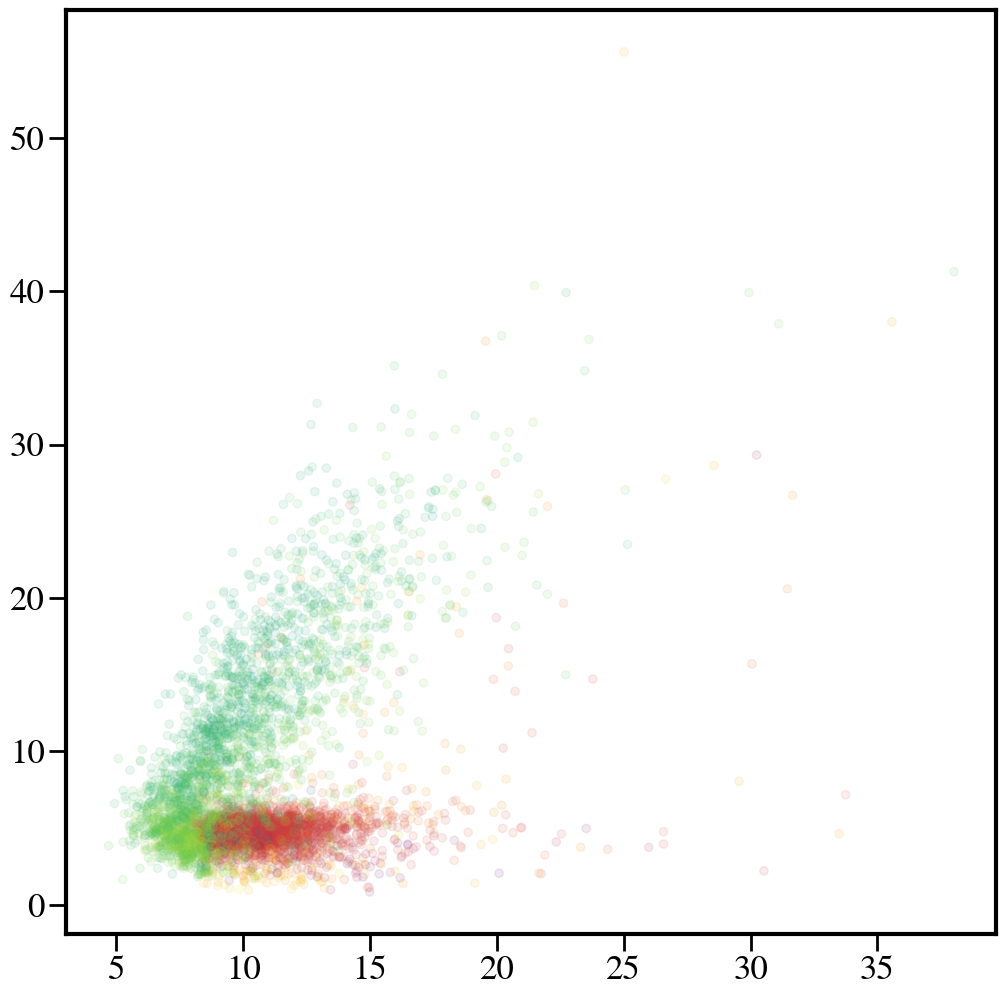

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

ax.scatter(r_star[qg], r_gas[qg], c=np.log10((m_d/m_g))[qg], alpha=0.1, cmap='inferno')
ax.scatter(r_star[sf], r_gas[sf], c=np.log10((m_d/m_g))[sf], alpha=0.1)

/tmp/ipykernel_152917/1494389980.py:2: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10((m_d/m))[qg], r_gas[qg], c=np.log10(T_cgm)[qg], alpha=0.1, cmap='inferno')
/tmp/ipykernel_152917/1494389980.py:3: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10((m_d/m))[sf], r_gas[sf], c=np.log10((T_cgm))[sf], alpha=0.1)


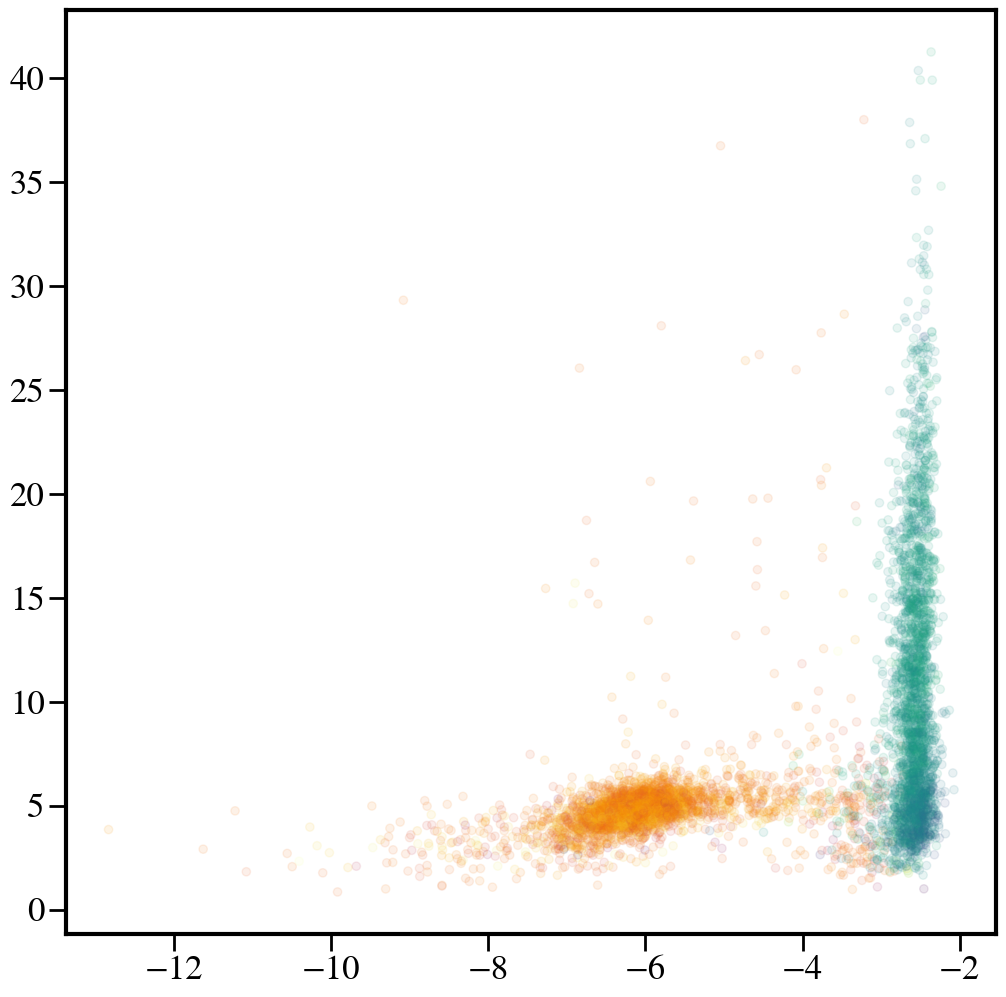

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(np.log10((m_d/m))[qg], r_gas[qg], c=np.log10(T_cgm)[qg], alpha=0.1, cmap='inferno')
ax.scatter(np.log10((m_d/m))[sf], r_gas[sf], c=np.log10((T_cgm))[sf], alpha=0.1)

/tmp/ipykernel_4089723/1012978750.py:12: RuntimeWarning: divide by zero encountered in log10
  np.log10((m_d/m))[qg], # Z-axis (log10(m_d/m))
/tmp/ipykernel_4089723/1012978750.py:13: RuntimeWarning: divide by zero encountered in log10
  c=np.log10((m_d/m))[qg], # Color by log10(m_d/m)


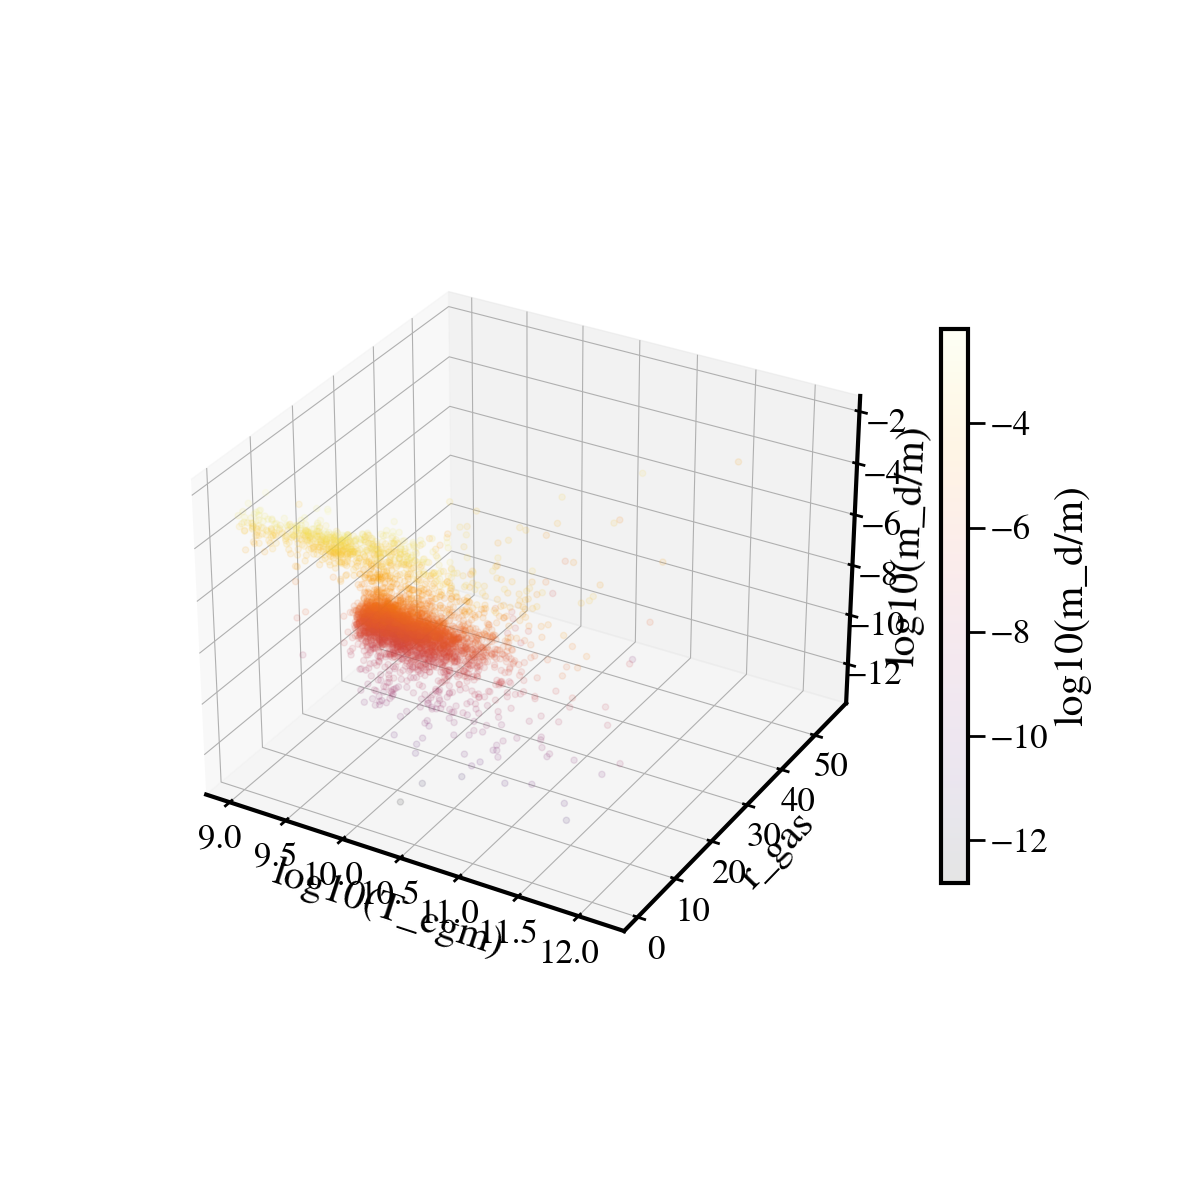

In [85]:
# Enable interactive plotting in Jupyter Lab
%matplotlib widget


# Create 3D figure and axis
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three dimensions (T_cgm, r_gas, m_d/m)
sc = ax.scatter(np.log10(m)[qg],  # X-axis (log10(T_cgm))
                r_gas[qg],            # Y-axis (r_gas)
                np.log10((m_d/m))[qg], # Z-axis (log10(m_d/m))
                c=np.log10((m_d/m))[qg], # Color by log10(m_d/m)
                alpha=0.1, cmap='inferno')

# Add colorbar for the scatter plot
cb = fig.colorbar(sc, ax=ax, shrink=0.6)
cb.set_label('log10(m_d/m)')

# Set axis labels
ax.set_xlabel('log10(T_cgm)')
ax.set_ylabel('r_gas')
ax.set_zlabel('log10(m_d/m)')

# Show the plot
plt.show()

In [13]:
sb = anal.Simba('cis', size='50_full')
galaxy_id = 1
snap = 100
snapfile = '/mnt/home/glorenzon/simbanator/output/hdf5/filtered_part_files/snap_100/region_snap100_r50_gal000001.h5'
#snapfile = sb.get_sim_file(snap)
catfile = sb.get_caesar_file(snap)

properties_dict = {
    'PartType0': ['Masses', 'Dust_Masses_s'],            
    'PartType4': ['Masses']
}

dim = {
    'PartType0': ['code_mass', 'Msun'],
    'PartType4': ['code_mass', 'Msun']
}


radii, masses = radial_profile(snapfile, catfile,
                                     galaxy_id, properties_dict,
                                     radii=np.arange(0, 100, 1),
                                     region=True, dens=True, dim=dim, norm=False)



yt : [INFO     ] 2024-10-26 16:34:53,269 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-26 16:34:53,283 Calculating time from 4.661e-01 to be 1.695e+17 seconds
yt : [INFO     ] 2024-10-26 16:34:53,285 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-26 16:34:53,381 Parameters: current_time              = 1.694799870056887e+17 s
yt : [INFO     ] 2024-10-26 16:34:53,382 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-26 16:34:53,383 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-26 16:34:53,384 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-26 16:34:53,385 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-26 16:34:53,385 Parameters: current_redshift          = 1.145471554829339
yt : [INFO     ] 2024-10-26 16:34:53,386 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-26 16:34:53,388 Paramete

yt : [INFO     ] 2024-10-26 16:34:55,063 Opening /mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full//Groups/m50n512_100.hdf5
yt : [INFO     ] 2024-10-26 16:34:55,103 Found 66852 halos
yt : [INFO     ] 2024-10-26 16:34:55,143 Found 4730 galaxies


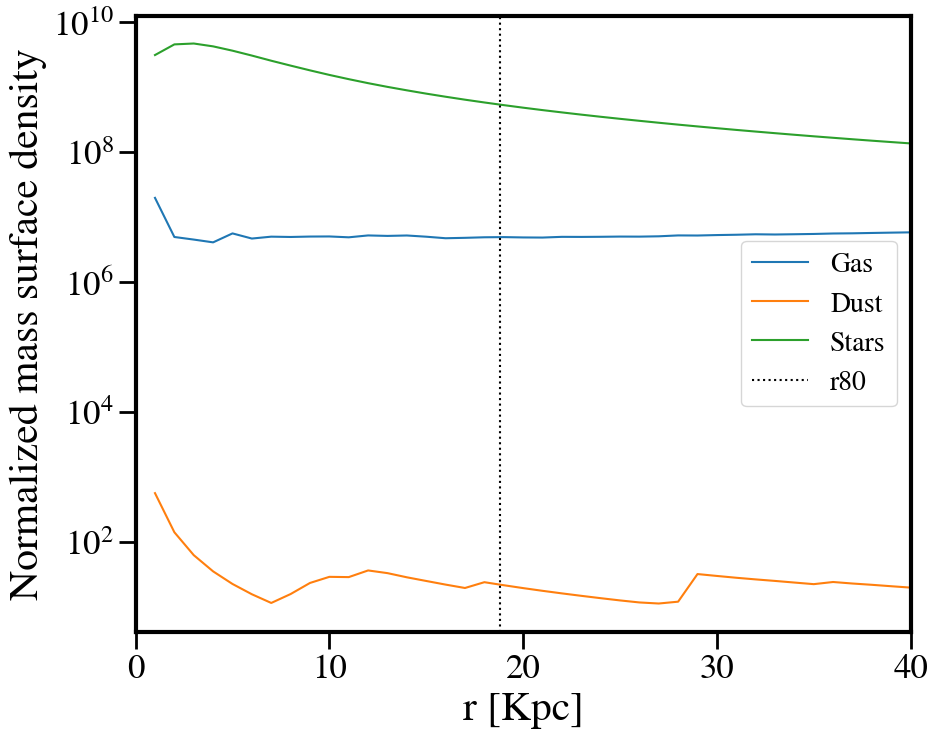

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

cs = sb.get_caesar(snap)
r80 = [i.radii['stellar_r80'] for i in cs.galaxies if i.GroupID == galaxy_id][0]

# # Define the 1/x^2 function for fitting
# def func(x, A):
#     return A / x**2


# mask = radii > 25
# radii_fit = radii[mask]
# m_stars_fit = masses['PartType4']['Masses'][mask]

# # Perform the curve fitting
# popt, pcov = curve_fit(func, radii_fit, m_stars_fit)
# A_fit = popt[0]

# # Generate the fitted curve using the entire radii array
# fitted_stars = func(radii, A_fit)

# Plot the original data and the fitted curve
plt.plot(radii, masses['PartType0']['Masses'], label='Gas')
plt.plot(radii, masses['PartType0']['Dust_Masses_s'], label='Dust')
plt.plot(radii, masses['PartType4']['Masses'], label='Stars')
#plt.plot(radii, fitted_stars, 'r--', label=f'1/x^2 (r>)')  # Fitted curve
plt.axvline(r80, label='r80', color='k', ls=':')
plt.yscale('log')
plt.xlim(0, 40)
#plt.ylim(0, 10)
plt.ylabel('Normalized mass surface density')
plt.xlabel('r [Kpc]')
plt.legend()
plt.show()

#print([i.radii['stellar_r80'] for i in cs.galaxies][0])

In [37]:
import yt
import numpy as np
import caesar

def radial_profile(snapfile, catfile, galaxy_id, properties_dict,\
                   radii=np.arange(0, 100, 1), region=False, dens=False, dim=None, norm=True):
    """
    Load snapshot data and return radial profiles of specified properties, always loading coordinates.
    
    Parameters:
    - snapfile: path to the simulation snapshot file.
    - catfile: path to the Caesar catalog file.
    - galaxy_id: the index of the galaxy in the Caesar catalog.
    - properties_dict: dictionary where keys are particle types (e.g., 'PartType0') and values are lists of properties (e.g., ['Masses', 'Metallicity']).
                       Properties can include operations like 'Sfr/Masses'.
    - radii: range of radii for which to compute profiles (default: np.arange(0, 100, 1)).
    - region: Boolean to compute properties for a larger region or just the galaxy itself.
    - dim: dictionary where keys are particle types and values are lists of unit conversions for each property.
    
    Returns:
    - radii: array of radial distances.
    - profiles: dictionary containing radial profiles for each particle type and property.
    """
    ds = yt.load(snapfile)
    obj = caesar.load(catfile)
    ad = ds.all_data()
    gal = [i for i in obj.galaxies if i.GroupID == galaxy_id][0]
    center = gal.pos.in_units('kpc').value

        pos = ad[particle_type, 'Coordinates'].in_units('kpc').value
        if indices is not None:
            pos = pos[indices]
        data_list = []
        for prop in props:
            data = ad[particle_type, prop[:-2] if '_s' in prop else prop]
            if indices is not None:
                data = data[indices]
    
    def get_data(particle_type, prop, dim, indices=None):
        # Check if the property is a combination like 'Sfr/Masses'
        if '/' in prop:
            prop1, prop2 = prop.split('/')
            data1 = ad[particle_type, prop1[:-2] if '_s' in prop1 else prop1]
            data2 = ad[particle_type, prop2[:-2] if '_s' in prop2 else prop2]
            if indices is not None:
                data1 = data1[indices]
                data2 = data2[indices]
            data1 = ds.arr(data1, dim[particle_type][prop1][0]).in_units(dim[particle_type][prop1][1]).value
            data2 = ds.arr(data2, dim[particle_type][prop2][0]).in_units(dim[particle_type][prop2][1]).value
            return data1 / data2
        else:
            data = ad[particle_type, prop]
            if indices is not None:
                data = data[indices]
            return ds.arr(data, dim[particle_type][prop][0]).in_units(dim[particle_type][prop][1]).value

    # Prepare to store profiles
    profiles = {ptype: {prop: [] for prop in properties_dict[ptype]} for ptype in properties_dict}

    # Load coordinates and relevant properties for each particle type
    if region:
        for ptype, props in properties_dict.items():
            if ptype == 'PartType0':  # Gas particles
                pos = ad[ptype, 'Coordinates'].in_units('kpc').value
                data = [get_data(ptype, prop, dim) for prop in props]
            elif ptype == 'PartType4':  # Star particles
                pos = ad[ptype, 'Coordinates'].in_units('kpc').value
                data = [get_data(ptype, prop, dim) for prop in props]

            # Calculate radial distances from galaxy center
            radial_distances = np.sqrt(np.sum((pos - center) ** 2, axis=1))

            # Calculate radial profiles for the current particle type and properties
            for r in radii:
                mask = radial_distances < r
                A = np.pi * r ** 2
                
                for i, prop in enumerate(props):
                    if dens:
                        profiles[ptype][prop].append(sum(data[i][mask]) / A)  # Surface density
                    else:
                        profiles[ptype][prop].append(np.mean(data[i][mask]))  # Mean property like metallicity

    else:
        for ptype, props in properties_dict.items():
            if ptype == 'PartType0':  # Gas particles
                pos = ad[ptype, 'Coordinates'].in_units('kpc').value
                pos = pos[gal.glist]
                data = [get_data(ptype, prop, dim, indices=gal.glist) for prop in props]
            elif ptype == 'PartType4':  # Star particles
                pos = ad[ptype, 'Coordinates'].in_units('kpc').value
                pos = pos[gal.slist]
                data = [get_data(ptype, prop, dim, indices=gal.slist) for prop in props]

            # Calculate radial distances from galaxy center
            radial_distances = np.sqrt(np.sum((pos - center) ** 2, axis=1))
            
            # Calculate radial profiles for the current particle type and properties
            for r in radii:
                mask = radial_distances < r
                A = np.pi * r ** 2
                
                for i, prop in enumerate(props):
                    if dens:
                        profiles[ptype][prop].append(sum(data[i][mask]) / A)  # Surface density
                    else:
                        profiles[ptype][prop].append(np.mean(data[i][mask]))  # Mean property like metallicity

    # Normalize the profiles
    if norm:
        for ptype in profiles:
            for prop in profiles[ptype]:
                if len(profiles[ptype][prop]) > 0:
                    temp = np.array(profiles[ptype][prop])
                    profiles[ptype][prop] = (temp - np.nanmin(temp)) / (np.nanmax(temp) - np.nanmin(temp))
    else:
        for ptype in profiles:
            for prop in profiles[ptype]:
                if len(profiles[ptype][prop]) > 0:
                    profiles[ptype][prop] = np.array(profiles[ptype][prop])

    return radii, profiles


In [39]:
sb = anal.Simba('PC39BP4', size=25)
galaxy_id = 0
snap = 129
snapfile = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/region_snap129_r100_gal000000.h5'
#snapfile = sb.get_sim_file(snap)
catfile = sb.get_caesar_file(snap)

properties_dict = {
    'PartType0': ['Masses', 'Dust_Masses_s'],            
    'PartType4': ['Masses']
}

dim = {
    'PartType0': {
        'Masses': ['code_mass', 'Msun'],
        'Dust_Masses_s': ['code_mass', 'Msun']
    },
    'PartType4': {
        'Masses': ['code_mass', 'Msun']
    }
}



radii, masses = radial_profile(snapfile, catfile,
                                     galaxy_id, properties_dict,
                                     radii=np.arange(0, 100, 1),
                                     region=True, dens=True, dim=dim, norm=True)



yt : [INFO     ] 2024-09-13 22:40:30,607 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-09-13 22:40:30,607 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-09-13 22:40:30,627 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-09-13 22:40:30,627 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-09-13 22:40:30,628 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-13 22:40:30,628 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-09-13 22:40:30,628 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-09-13 22:40:30,628 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-09-13 22:40:30,628 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-09-13 22:40:30,629 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-09-13 22:40:30,629 Parameters: omega_radiation     

YTFieldNotFound: Could not find field ('PartType0', 'Dust_Masses_s') in region_snap129_r100_gal000000.
Did you mean:
	('PartType0', 'Dust_Masses')